In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28*28*1)
X_test = X_test.reshape(X_test.shape[0],28*28*1)
X_train = X_train.astype("float32")/255.0
X_test = X_test.astype("float32")/255.0

In [4]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)


In [15]:
model = Sequential()
model.add(Dense(64,input_shape=(784,),activation="sigmoid"))
model.add(Dense(32,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))

In [21]:
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=['accuracy'])
epochs = 11
H = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=epochs,batch_size=128)

Epoch 1/11
469/469 [==============================] - 2s 3ms/step - loss: 1.1362 - accuracy: 0.7394 - val_loss: 1.0829 - val_accuracy: 0.7559
Epoch 2/11
469/469 [==============================] - 1s 3ms/step - loss: 1.0523 - accuracy: 0.7590 - val_loss: 1.0047 - val_accuracy: 0.7760
Epoch 3/11
469/469 [==============================] - 1s 3ms/step - loss: 0.9790 - accuracy: 0.7757 - val_loss: 0.9359 - val_accuracy: 0.7940
Epoch 4/11
469/469 [==============================] - 1s 3ms/step - loss: 0.9145 - accuracy: 0.7912 - val_loss: 0.8754 - val_accuracy: 0.8028
Epoch 5/11
469/469 [==============================] - 2s 4ms/step - loss: 0.8574 - accuracy: 0.8035 - val_loss: 0.8211 - val_accuracy: 0.8158
Epoch 6/11
469/469 [==============================] - 2s 3ms/step - loss: 0.8068 - accuracy: 0.8150 - val_loss: 0.7735 - val_accuracy: 0.8242
Epoch 7/11
469/469 [==============================] - 1s 3ms/step - loss: 0.7620 - accuracy: 0.8249 - val_loss: 0.7311 - val_accuracy: 0.8321
Epoch 

In [22]:
prediction = model.predict(X_test,batch_size=128)
print(classification_report(prediction.argmax(axis=1),Y_test.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1053
           1       0.98      0.91      0.94      1230
           2       0.84      0.89      0.87       975
           3       0.87      0.82      0.84      1063
           4       0.83      0.81      0.82      1007
           5       0.71      0.82      0.76       776
           6       0.93      0.87      0.90      1024
           7       0.88      0.90      0.89      1008
           8       0.75      0.86      0.81       852
           9       0.78      0.78      0.78      1012

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.86      0.86      0.86     10000



[]

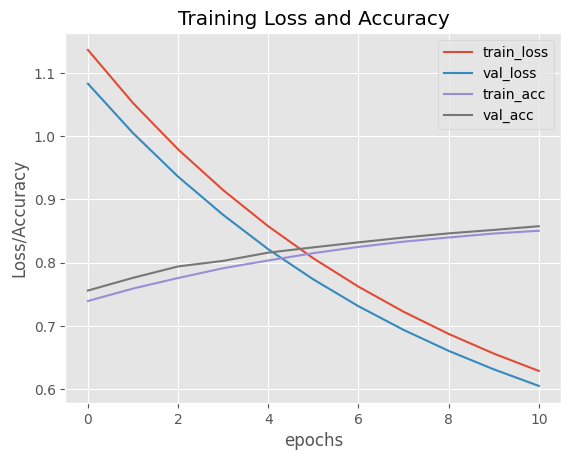

In [23]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,epochs),H.history['loss'],label='train_loss')
plt.plot(np.arange(0,epochs),H.history['val_loss'],label='val_loss')
plt.plot(np.arange(0,epochs),H.history['accuracy'],label='train_acc')
plt.plot(np.arange(0,epochs),H.history['val_accuracy'],label='val_acc')
plt.legend()
plt.title("Training Loss and Accuracy")
plt.xlabel("epochs")
plt.ylabel("Loss/Accuracy")
plt.plot()